## Author - Komal
## Domain - Machine Learning 

# IRIS FLOWER CLASSIFICATION
---

## The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

## Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.


## About Dataset : 

## The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.



Variabl Nam  | 	Role    | 	Type         | 	Description            | 	Units
---
sepal leng  |th	Featur    | e	Continuou | s	Length of the sepa    | l	cm
sepal wid  | th	Featu    | re	Continuo | us	Width of the sep    | al	cm
petal le  |ngth	Feat    | ure	Continu | ous	Length of the pe    | tal	cm
petal w  | idth	Fea    | ture	Contin | uous	Width of the p    | etal	cm
      | class	      | arget	Catego | rical	Class of iris plant: Iris Setosa, Iris Versicolour, or Iris Virg

inica	

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head(5) # Read first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail(5) # Read last 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Shape of the dataframe

In [6]:
df.shape

(150, 5)

### Information about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Full Description

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Display number of samples on each class

In [9]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocessing the dataset 

### Checking for null/missing values in the dataset

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

'Observation:'

- No null values present in the dataset

### Checking for duplicate values

In [11]:
df.duplicated().sum()

3

### Dropping the duplicate rows

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

'Observation:'

- No duplicate values present in the dataset

## Exploratory Data Analysis

Histogram for sepal length


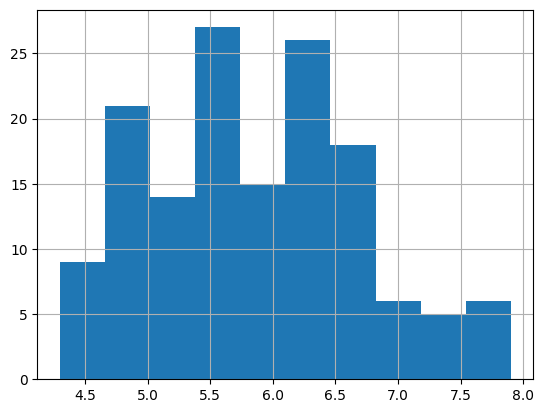

In [14]:
df['sepal_length'].hist()
print("Histogram for sepal length")

Histogram for Sepal width


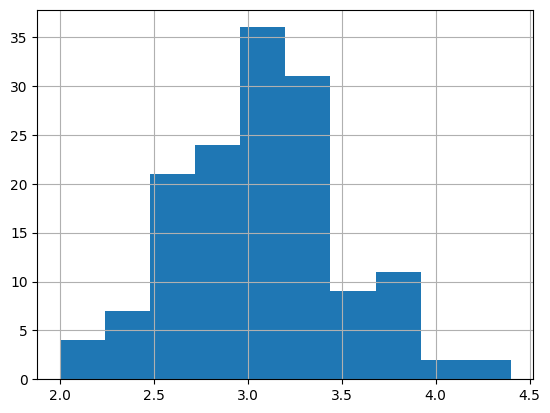

In [15]:
df['sepal_width'].hist()
print("Histogram for Sepal width")

Histogram for  petal length


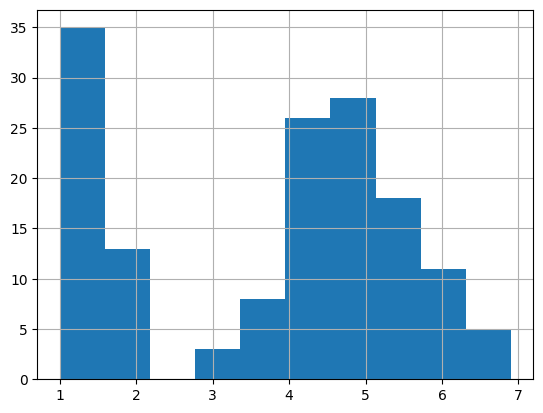

In [16]:
df['petal_length'].hist()
print("Histogram for  petal length")

Histogram for petal width


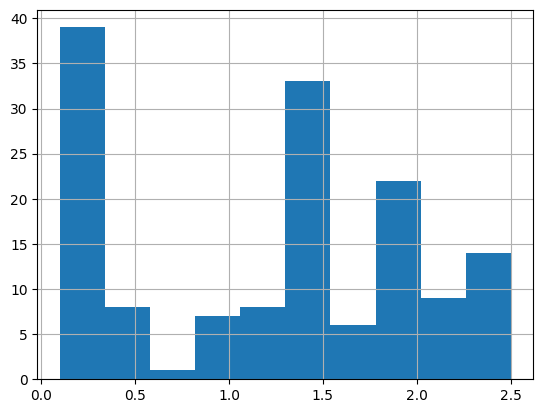

In [17]:
df['petal_width'].hist()
print("Histogram for petal width")

### Display Scatter plot

In [18]:
colors = ['red' , 'orange' , 'blue']
species = ['Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica']

### 1. Scatter Plot of Sepal length Vs Sepal Width

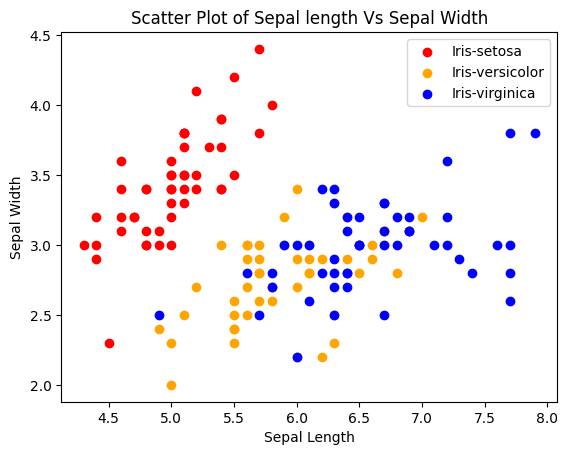

In [19]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'] , x['sepal_width'] , c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal length Vs Sepal Width')
plt.legend()
plt.show()

### 2. Scatter Plot of petal length Vs petal Width

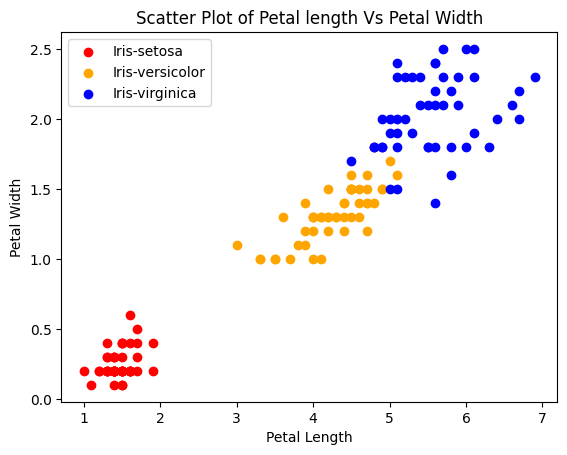

In [20]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'] , x['petal_width'] , c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal length Vs Petal Width')
plt.legend()
plt.show()

### 3. Scatter Plot of Sepal length Vs petal length

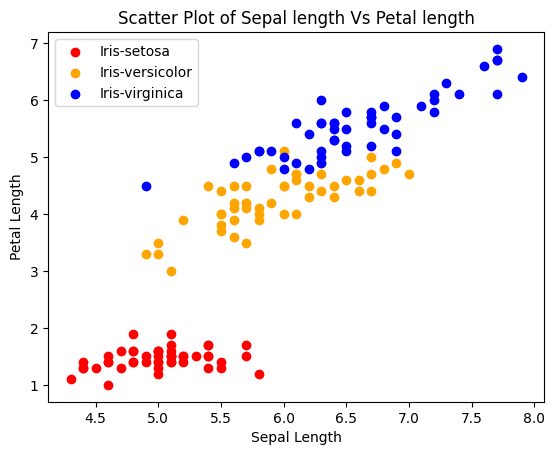

In [21]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'] , x['petal_length'] , c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal length Vs Petal length')
plt.legend()
plt.show()

### 4. Scatter Plot of Sepal width Vs petal Width

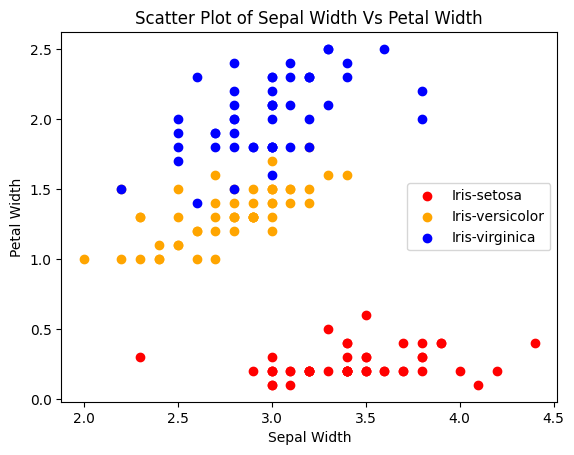

In [22]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'] , x['petal_width'] , c = colors[i], label = species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Sepal Width Vs Petal Width')
plt.legend()
plt.show()

'observation':

This is considering the best because of easily seperable
- 2. Scatter Plot of petal length Vs petal Width

### Display of Species

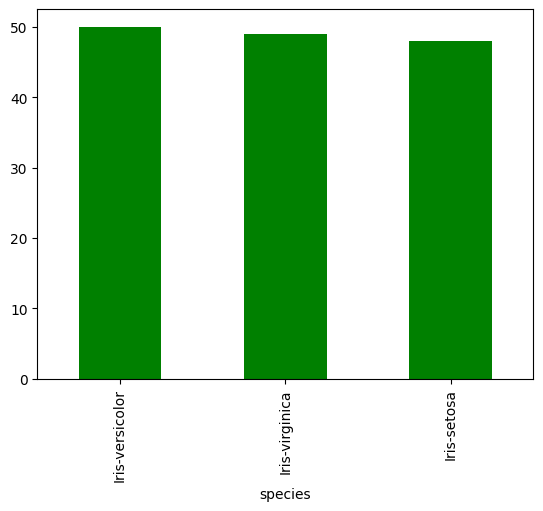

In [23]:
df['species'].value_counts().plot(kind='bar',color='g')
plt.show()

### Pie chart of different Species

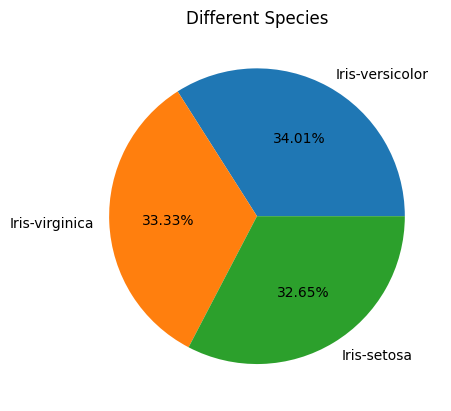

In [24]:
plt.pie(df['species'].value_counts(),labels=df['species'].value_counts().index,autopct="%1.2f%%")
plt.title("Different Species")
plt.show()

'observations' :

- Iris-versicolor species has highest in percentage like 34.01%
- Iris-setosa species has least in percentage like 33.33%

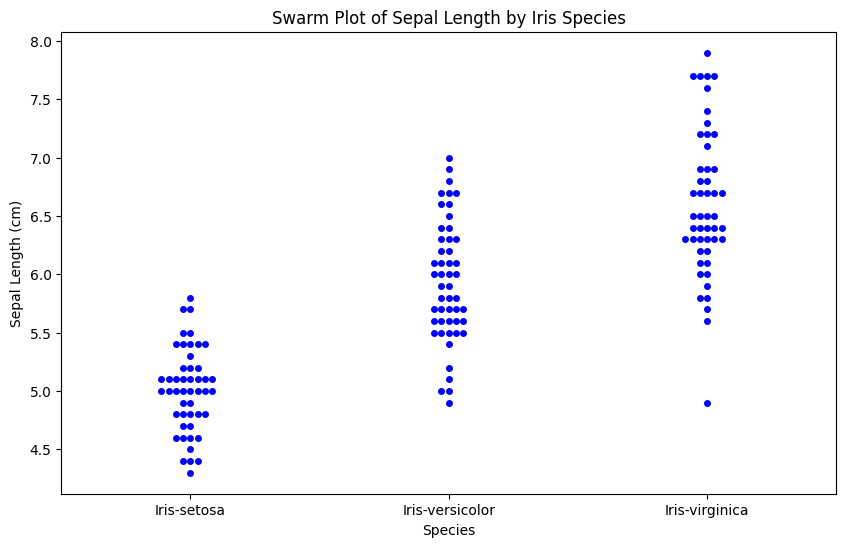

In [25]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="species", y="sepal_length", color ='b', data=df)
plt.title("Swarm Plot of Sepal Length by Iris Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()


## Distribution

### 1. Distribution of Sepal Length

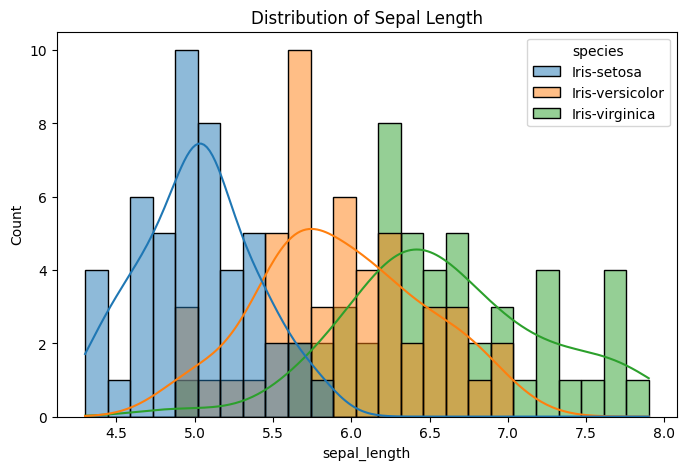

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sepal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Length")
plt.show()

### 2. Distribution of Sepal Width

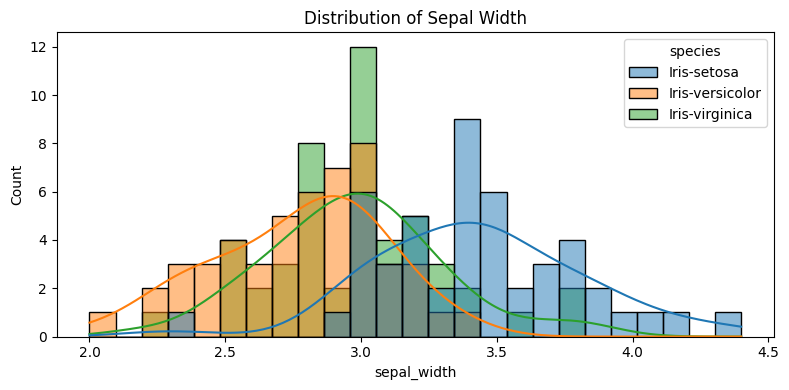

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='sepal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Width")
plt.tight_layout()
plt.show()

### 3. Distribution of Petal Length

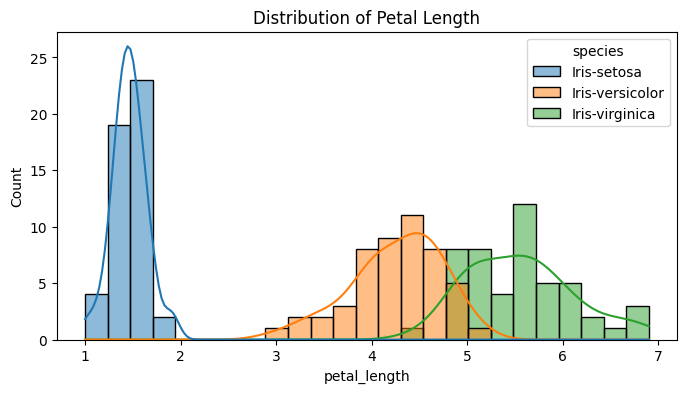

In [29]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='petal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Length")
plt.show()


### 4. Distribution of Petal Width

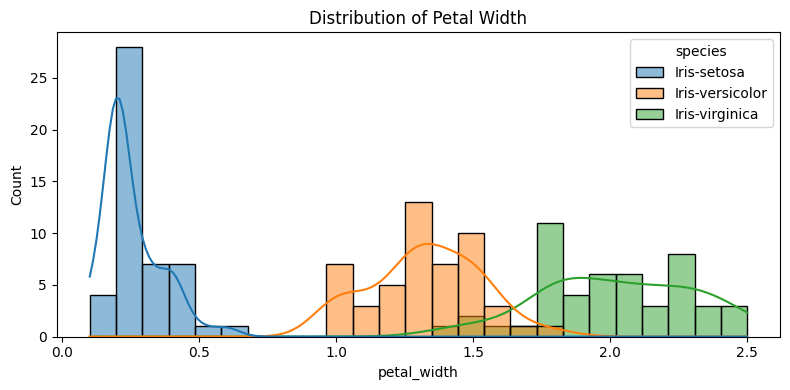

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='petal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Width")
plt.tight_layout()
plt.show()

## Display Pairplot

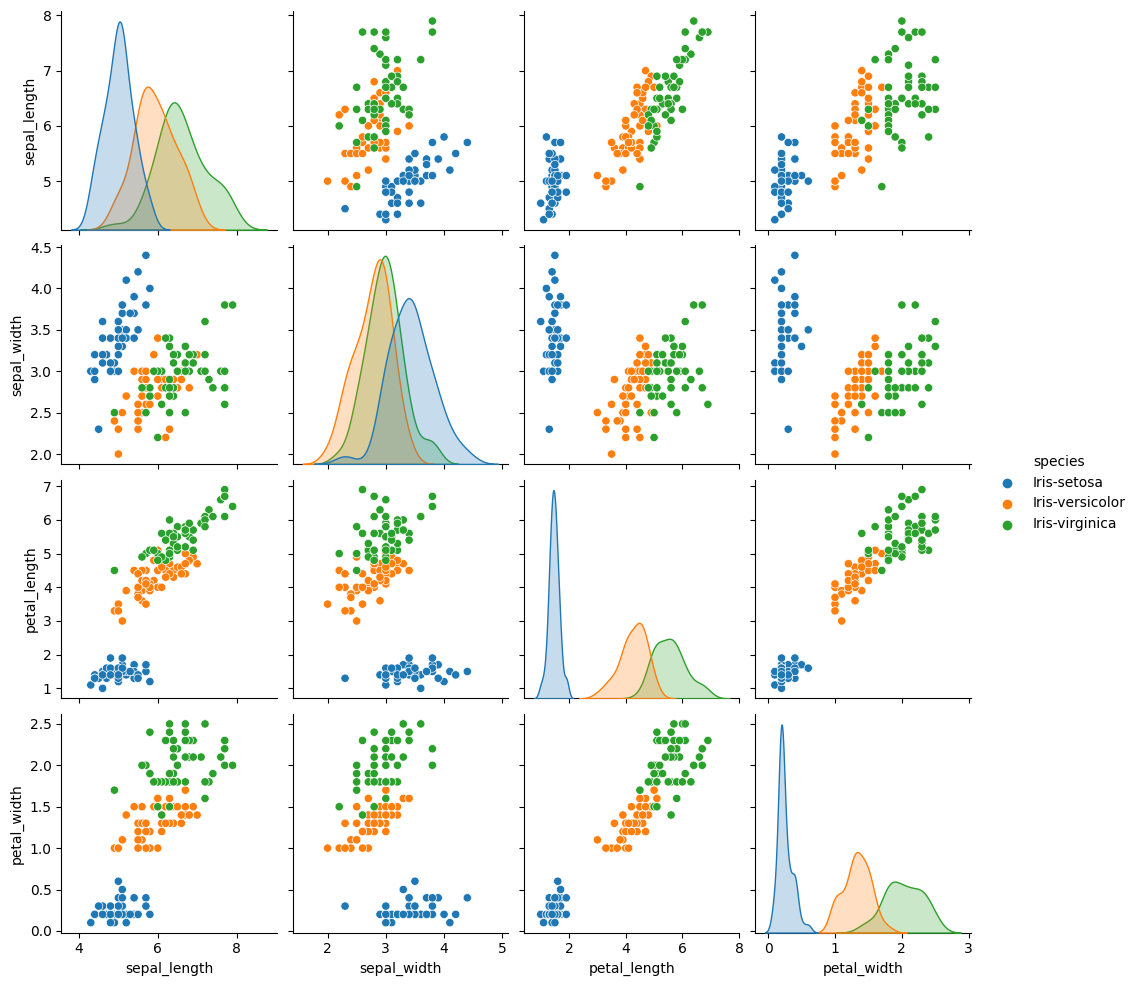

In [31]:
sns.pairplot(df,hue='species')
plt.show()

## Correlation Matrix

### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

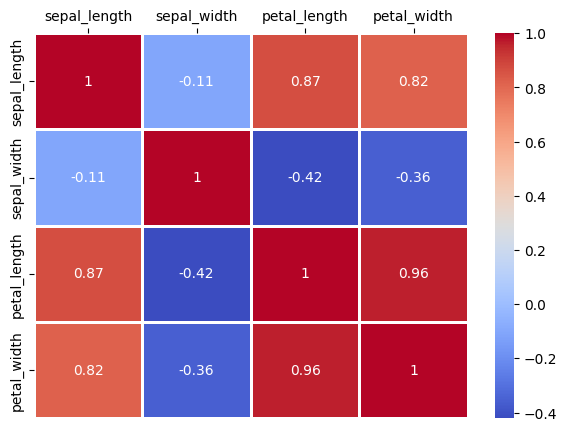

In [42]:
corr=df.corr(numeric_only = True)
fig, ax=plt.subplots(figsize=(7,5))
sns.heatmap(corr,annot=True,ax=ax, cmap = 'coolwarm', linewidth=1 )
ax.xaxis.tick_top()
plt.show()

'Observation' :

- The strength of the relationship between the two variables is weak. This means that changes in one variable are not strongly associated with changes in the other variable.

- Positive Relationship: The positive sign indicates that as one variable increases, the other variable tends to increase as well, but the relationship is not strong.

- Limited Predictive Power: Since the correlation coefficient is low, it suggests that using one variable to predict the other may not be very accurate. In other words, knowing the value of one variable provides limited information about the value of the other variable.


'Conclusion':

There is correlation between :

- sepal_length and sepal_width : Negative correlation with -0.11
- sepal_width and petal_length : Negative correlation with -0.42
- petal_length and petal_width : Positive correlation with 0.96


## Machine learning

### Checking for outlier

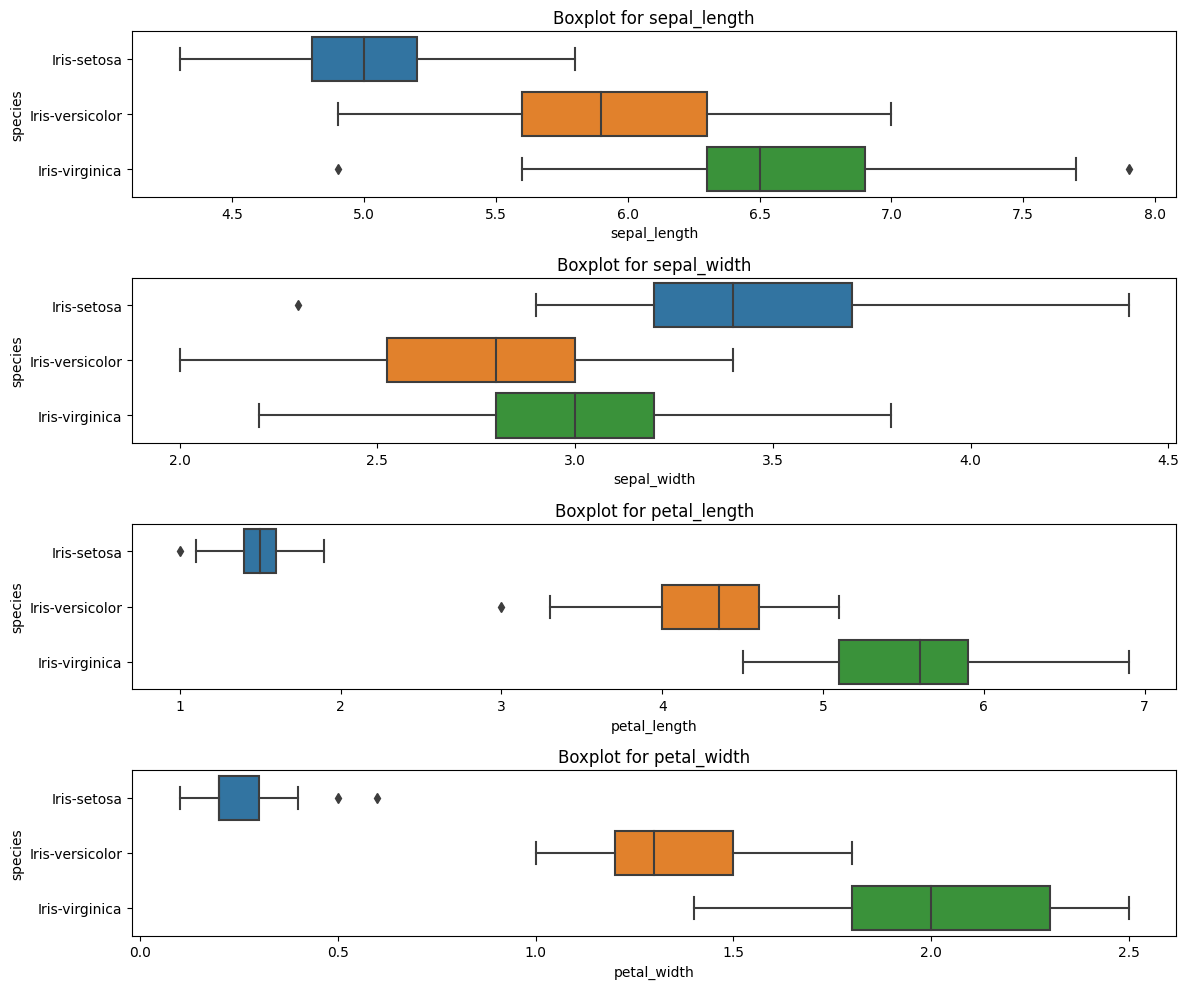

In [43]:
numerical_data = [col for col in df.columns if df.dtypes[col]!='object']
plt.figure(figsize=(12, 10))
for i in range(len(numerical_data)):
    plt.subplot(len(numerical_data),1, i + 1)  
    sns.boxplot(x=numerical_data[i], y='species', data=df)
    plt.title(f'Boxplot for {numerical_data[i]}')
plt.tight_layout()  
plt.show()


## Label Encoder

### In Machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Lbel Encoding refers to converting the labels into numeric from so as to convert it into the machine-readable form.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
X = df.drop(columns = ['species'], axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
y = df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

### Train test split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
47,4.6,3.2,1.4,0.2
58,6.6,2.9,4.6,1.3
41,4.5,2.3,1.3,0.3
38,4.4,3.0,1.3,0.2
116,6.5,3.0,5.5,1.8
...,...,...,...,...
135,7.7,3.0,6.1,2.3
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3
143,6.8,3.2,5.9,2.3


In [52]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
101,5.8,2.7,5.1,1.9
95,5.7,3.0,4.2,1.2
56,6.3,3.3,4.7,1.6
105,7.6,3.0,6.6,2.1
100,6.3,3.3,6.0,2.5
77,6.7,3.0,5.0,1.7
91,6.1,3.0,4.6,1.4
55,5.7,2.8,4.5,1.3
46,5.1,3.8,1.6,0.2
61,5.9,3.0,4.2,1.5


In [53]:
y_train

47     0
58     1
41     0
38     0
116    2
      ..
135    2
139    2
74     1
143    2
39     0
Name: species, Length: 102, dtype: int32

In [54]:
y_test

101    2
95     1
56     1
105    2
100    2
77     1
91     1
55     1
46     0
61     1
5      0
16     0
93     1
14     0
60     1
33     0
75     1
29     0
68     1
36     0
119    2
86     1
31     0
130    2
111    2
19     0
53     1
50     1
122    2
144    2
127    2
134    2
44     0
140    2
28     0
42     0
107    2
120    2
17     0
113    2
80     1
71     1
76     1
18     0
4      0
Name: species, dtype: int32

## Model Training

### 1.  Logistic regression

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [100]:
model.fit(X_train, y_train)

LogisticRegression()

### Print metric to get Performance

In [101]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = model.predict(X_test)
accuracy_l = accuracy_score(y_pred, y_test)
print("Accuracy score(Logistic Regression) :",accuracy_l*100)

Accuracy score(Logistic Regression) : 95.55555555555556


In [102]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Logistic Regression) is : \n', cls_report)

classification report for our model(Logistic Regression) is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### 2. Knn - nearest Neighbours

In [103]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [104]:
model.fit(X_train, y_train)

KNeighborsClassifier()

### Print metric to get Performance

In [105]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = model.predict(X_test)
accuracy_k = accuracy_score(y_pred, y_test)
print("Accuracy score(KNN - nearest neighbors) :",accuracy_k*100)

Accuracy score(KNN - nearest neighbors) : 97.77777777777777


In [106]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(KNN - nearest neighbors) is : \n', cls_report)

classification report for our model(KNN - nearest neighbors) is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 3. Decision tree classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [108]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Print metric to get Performance

In [109]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = model.predict(X_test)
accuracy_d = accuracy_score(y_pred, y_test)
print("Accuracy score(Decision tree classifer) :",accuracy_d*100)

Accuracy score(Decision tree classifer) : 93.33333333333333


In [110]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Decision tree classifier) is : \n', cls_report)

classification report for our model(Decision tree classifier) is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.88      0.91        17
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Accuracy Comparison of Machine Learning Models

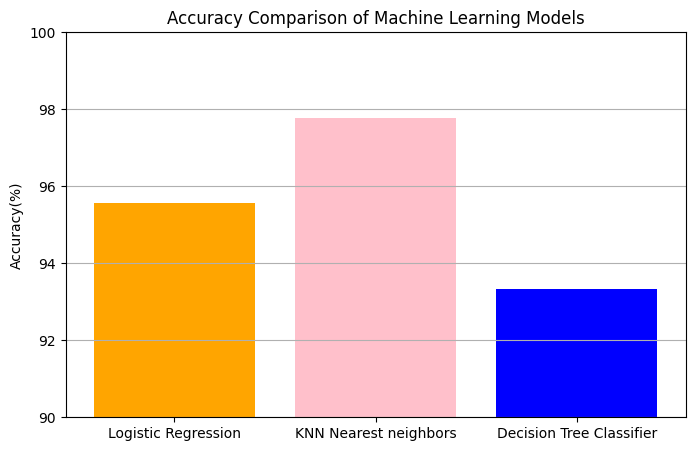

In [111]:
# Model names
models = ['Logistic Regression', 'KNN Nearest neighbors' ,'Decision Tree Classifier']

# Accuracy values
acc = [accuracy_l*100, accuracy_k*100, accuracy_d*100]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, acc , color=['orange', 'pink', 'blue'] )
plt.ylim(90, 100)  
plt.ylabel('Accuracy(%)')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.grid(axis = 'y')
plt.show()


'observations' :

- Knn - nearest Neighbours slightly outperformed the Logistic Regression & Decision Tree Classifier
- least performer is Decision Tree Classifier

## Conclusion :

Correlation analysis is a method for measuring the covariance of two random variables in a matched data set. Covariance is usually expressed as the correlation coefficient of two variables X and Y. The correlation coefficient is a unitless number that varies from -1 to +1.

There is correlation between :

- sepal_length and sepal_width : Negative correlation with -0.11
- sepal_width and petal_length : Negative correlation with -0.42
- petal_length and petal_width : Positive correlation with 0.96




In this project, I explored the task of Iris Flower Classification. My analysis revealed valuable insights into the performance and effectiveness of the model in capturing the classification.


In this project, I compared three machine learning algorithms for Iris flower classification :

1. Logistic Regression:
Accuracy score(Logistic Regression) : 95.56%


2. Knn - nearest Neighbours
Accuracy score(KNN - nearest neighbors) : 97.77%


3. Decision Tree Classifier:
Accuracy score(Decision tree classifer) : 93.33%

Knn - nearest Neighbours slightly outperformed the Logistic Regression & Decision Tree Classifier, indicating it was better suited for this dataset. However, All models demonstrated strong performance, confirming the effectiveness of these techniques for Iris flower classification. Future work could explore other advanced algorithms to further improve accuracy.
